In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, BayesianRidge, HuberRegressor, SGDRegressor, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [96]:
df = pd.read_csv('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/spam.csv')

KeyboardInterrupt: 

In [ ]:
data = df.copy()
data.iloc[:,:15]

,make,address,all,num3d,our,over,remove,internet,order,mail,receive,will,people,report,addresses
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00


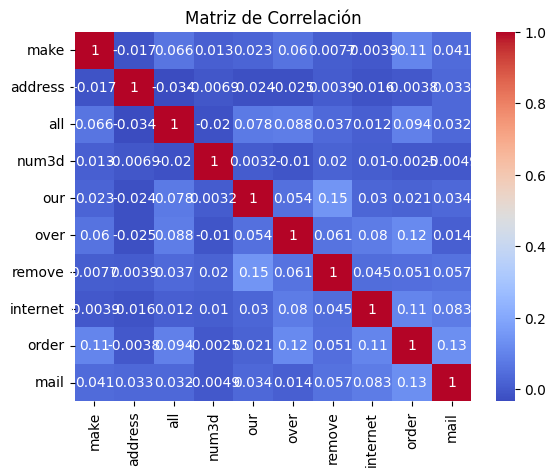

In [ ]:
data = df.copy()
data['type'] = data['type'].replace('spam', 0)
data['type'] = data['type'].replace('nonspam', 0)
correlation_matrix = data.iloc[:,:10].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
y = df['type']
X = df.drop('type', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=1)

In [ ]:
scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9278887923544744
              precision    recall  f1-score   support

     nonspam       0.92      0.96      0.94       701
        spam       0.94      0.87      0.90       450

    accuracy                           0.93      1151
   macro avg       0.93      0.92      0.92      1151
weighted avg       0.93      0.93      0.93      1151



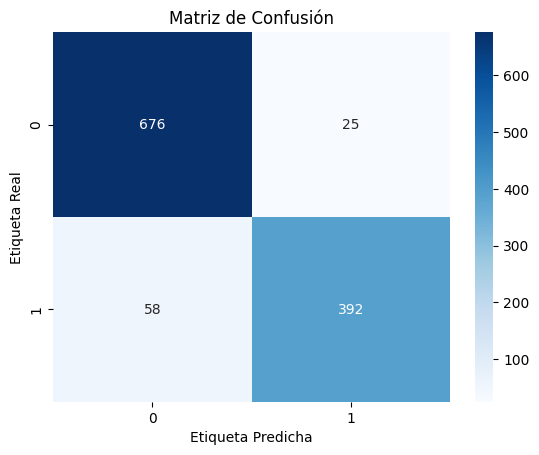

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
import random

def display_board(board):
    print(board[0] + '|' + board[1] + '|' + board[2])
    print('-+-+-')
    print(board[3] + '|' + board[4] + '|' + board[5])
    print('-+-+-')
    print(board[6] + '|' + board[7] + '|' + board[8])

def check_winner(board, player):
    win_conditions = [(0, 1, 2), (3, 4, 5), (6, 7, 8), (0, 3, 6), (1, 4, 7), (2, 5, 8), (0, 4, 8), (2, 4, 6)]
    for condition in win_conditions:
        if board[condition[0]] == board[condition[1]] == board[condition[2]] == player:
            return True
    return False

def check_board_full(board):
    return ' ' not in board

def get_computer_move(board):
    available_moves = [i for i in range(9) if board[i] == ' ']
    return random.choice(available_moves)

def main():
    board = [' ' for _ in range(9)]
    players = ['X', 'O']
    current_player = random.choice(players)

    while True:
        display_board(board)
        if current_player == 'X':
            move = int(input("Ingresa tu movimiento (0-8): "))
            while board[move] != ' ':
                print("Movimiento inválido. Inténtalo de nuevo.")
                move = int(input("Ingresa tu movimiento (0-8): "))
        else:
            move = get_computer_move(board)

        board[move] = current_player

        if check_winner(board, current_player):
            display_board(board)
            print(f"{current_player} gana!")
            break
        elif check_board_full(board):
            display_board(board)
            print("Empate!")
            break

        current_player = 'X' if current_player == 'O' else 'O'

if __name__ == "__main__":
    main()


 | | 
-+-+-
 | | 
-+-+-
 | | 
 | | 
-+-+-
 |X| 
-+-+-
 | | 
 | |O
-+-+-
 |X| 
-+-+-
 | | 
 | |O
-+-+-
 |X| 
-+-+-
 | |X
 | |O
-+-+-
 |X| 
-+-+-
 |O|X
X| |O
-+-+-
 |X| 
-+-+-
 |O|X
X gana!


In [ ]:
import numpy as np

# Definimos los símbolos para el triqui
EMPTY = 0
PLAYER_X = 1
PLAYER_O = -1

def print_board(board):
    symbols = ['_', 'X', 'O']
    for row in board:
        print(" ".join(symbols[symbol] for symbol in row))

def check_winner(board):
    lines = [
        [board[0][0], board[0][1], board[0][2]],
        [board[1][0], board[1][1], board[1][2]],
        [board[2][0], board[2][1], board[2][2]],
        [board[0][0], board[1][0], board[2][0]],
        [board[0][1], board[1][1], board[2][1]],
        [board[0][2], board[1][2], board[2][2]],
        [board[0][0], board[1][1], board[2][2]],
        [board[0][2], board[1][1], board[2][0]]
    ]
    for line in lines:
        if all(symbol == PLAYER_X for symbol in line):
            return PLAYER_X
        elif all(symbol == PLAYER_O for symbol in line):
            return PLAYER_O
    return EMPTY

def get_empty_cells(board):
    return [(i, j) for i in range(3) for j in range(3) if board[i][j] == EMPTY]

def minimax(board, depth, maximizing_player):
    winner = check_winner(board)
    if winner != EMPTY:
        return winner * (10 - depth)
    elif len(get_empty_cells(board)) == 0:
        return 0

    if maximizing_player:
        max_eval = float('-inf')
        for i, j in get_empty_cells(board):
            board[i][j] = PLAYER_X
            eval = minimax(board, depth + 1, False)
            board[i][j] = EMPTY
            max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for i, j in get_empty_cells(board):
            board[i][j] = PLAYER_O
            eval = minimax(board, depth + 1, True)
            board[i][j] = EMPTY
            min_eval = min(min_eval, eval)
        return min_eval

def get_best_move(board):
    best_move = None
    max_eval = float('-inf')
    for i, j in get_empty_cells(board):
        board[i][j] = PLAYER_X
        eval = minimax(board, 0, False)
        board[i][j] = EMPTY
        if eval > max_eval:
            max_eval = eval
            best_move = (i, j)
    return best_move

def main():
    board = [[EMPTY, EMPTY, EMPTY],
             [EMPTY, EMPTY, EMPTY],
             [EMPTY, EMPTY, EMPTY]]

    print("Triqui (Tic Tac Toe) con IA (Minimax)\n")
    print_board(board)

    while True:
        player_move = input("Ingresa tu movimiento (fila y columna separados por espacio): ")
        row, col = map(int, player_move.split())
        if board[row][col] != EMPTY:
            print("Casilla ocupada. Inténtalo de nuevo.")
            continue
        board[row][col] = PLAYER_O
        print_board(board)

        if check_winner(board) == PLAYER_O:
            print("¡Ganaste!")
            break
        elif len(get_empty_cells(board)) == 0:
            print("¡Empate!")
            break

        print("Turno de la IA...")
        ai_move = get_best_move(board)
        board[ai_move[0]][ai_move[1]] = PLAYER_X
        print_board(board)

        if check_winner(board) == PLAYER_X:
            print("¡La IA ganó!")
            break
        elif len(get_empty_cells(board)) == 0:
            print("¡Empate!")
            break

if __name__ == "__main__":
    main()


Triqui (Tic Tac Toe) con IA (Minimax)

_ _ _
_ _ _
_ _ _
O _ _
_ _ _
_ _ _
Turno de la IA...
O _ _
_ X _
_ _ _
O _ O
_ X _
_ _ _
Turno de la IA...
O X O
_ X _
_ _ _
O X O
_ X _
_ O _
Turno de la IA...
O X O
X X _
_ O _
O X O
X X O
_ O _
Turno de la IA...
O X O
X X O
_ O X
O X O
X X O
O O X
¡Empate!


In [102]:
import random

class ConnectFour:
    def __init__(self):
        self.rows = 6
        self.cols = 7
        self.board = [[' ' for _ in range(self.cols)] for _ in range(self.rows)]
        self.player = 'X'

    def print_board(self):
        for row in self.board:
            print('| ' + ' | '.join(row) + ' |')
        print('+---+---+---+---+---+---+---+')
        print('| 1 | 2 | 3 | 4 | 5 | 6 | 7 |')
        print()

    def make_move(self, col):
        for row in range(self.rows-1, -1, -1):
            if self.board[row][col] == ' ':
                self.board[row][col] = self.player
                return True
        return False

    def check_winner(self):
        # Check horizontal
        for row in range(self.rows):
            for col in range(self.cols - 3):
                if (self.board[row][col] == self.player and
                        self.board[row][col + 1] == self.player and
                        self.board[row][col + 2] == self.player and
                        self.board[row][col + 3] == self.player):
                    return True

        # Check vertical
        for row in range(self.rows - 3):
            for col in range(self.cols):
                if (self.board[row][col] == self.player and
                        self.board[row + 1][col] == self.player and
                        self.board[row + 2][col] == self.player and
                        self.board[row + 3][col] == self.player):
                    return True

        # Check diagonal \
        for row in range(self.rows - 3):
            for col in range(self.cols - 3):
                if (self.board[row][col] == self.player and
                        self.board[row + 1][col + 1] == self.player and
                        self.board[row + 2][col + 2] == self.player and
                        self.board[row + 3][col + 3] == self.player):
                    return True

        # Check diagonal /
        for row in range(3, self.rows):
            for col in range(self.cols - 3):
                if (self.board[row][col] == self.player and
                        self.board[row - 1][col + 1] == self.player and
                        self.board[row - 2][col + 2] == self.player and
                        self.board[row - 3][col + 3] == self.player):
                    return True

        return False

    def play(self):
        print("Bienvenido a Conecta 4!")
        print("El jugador es 'X' y la IA es 'O'.")
        print("Empieza el jugador.\n")
        self.print_board()

        while True:
            if self.player == 'X':
                col = int(input(f"Jugador {self.player}, elige una columna (1-7): ")) - 1
                if 0 <= col < self.cols and self.make_move(col):
                    self.print_board()
                    if self.check_winner():
                        print(f"¡El jugador {self.player} ha ganado!")
                        break
                    if all(self.board[i][col] != ' ' for i in range(self.rows)):
                        print("¡Empate!")
                        break
                    self.player = 'O'
            else:
                col = random.randint(0, self.cols - 1)
                while not self.make_move(col):
                    col = random.randint(0, self.cols - 1)
                self.print_board()
                if self.check_winner():
                    print("¡La IA ha ganado!")
                    break
                if all(self.board[i][col] != ' ' for i in range(self.rows)):
                    print("¡Empate!")
                    break
                self.player = 'X'


if __name__ == "__main__":
    game = ConnectFour()
    game.play()


Bienvenido a Conecta 4!
El jugador es 'X' y la IA es 'O'.
Empieza el jugador.

|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
| 1 | 2 | 3 | 4 | 5 | 6 | 7 |



|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   | X |   |   |   |   |
+---+---+---+---+---+---+---+
| 1 | 2 | 3 | 4 | 5 | 6 | 7 |

|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   | X |   | O |   |   |
+---+---+---+---+---+---+---+
| 1 | 2 | 3 | 4 | 5 | 6 | 7 |

|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   | X |   |   |   |   |
|   |   | X |   | O |   |   |
+---+---+---+---+---+---+---+
| 1 | 2 | 3 | 4 | 5 | 6 | 7 |

|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   |   |   |   |   |   |
|   |   | X |   |   |   |   |
|   |   | X |   | O | O |   |
+---+---+---+---+---+---+---+
| 1 | 2 | 3 | 4 | 5 | 6 | 7 |

|   |   |   |   |   |   |   |
|   | 